### Comparatif d'un neurones vs un reseaux a une couche vs un  reseaux a plusieurs couches

Creation de deux dataset de base l'un lineraire et l'autre non lineraire

In [ ]:
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
plt.style.use('dark_background')

In [ ]:
X_li,y_li = make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y_li = y_li.reshape((y_li.shape[0],1))
X_nl,y_nl = make_circles(n_samples=100,noise=0.1,factor=0.3,random_state=0)
y_nl = y_nl.reshape((y_nl.shape[0],1))
print("X_li shape :",X_li.shape,'\n y_li shape :',y_li.shape,'\n X_nl shape :',X_nl.shape,'\n y_nl shape :',y_nl.shape)

X_li shape : (100, 2) 
 y_li shape : (100, 1) 
 X_nl shape : (100, 2) 
 y_nl shape : (100, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

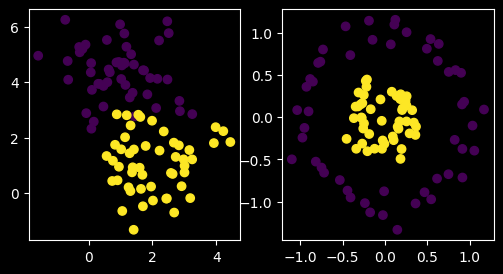

In [ ]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.scatter(X_li[:,0],X_li[:,1],label = 'data set lineraire 0',c=y_li,cmap='viridis')
plt.subplot(1,2,2)
plt.scatter(X_nl[:,0],X_nl[:,1],label='data set non lineraire',c=y_nl,cmap='viridis')
plt.show

#### Reseaux a un neurone

In [ ]:
import numpy as np
from numpy import random

In [ ]:
#initilisation
def initialisation_l(X):
    W = random.randn(X.shape[1],1)
    b = random.randn(1)
    
    return W,b

In [ ]:
#W_test,b_test = initialisation(X_li)
#print(W_test.shape)

In [ ]:
#forward propagation
def froward_propagation_l(W,b,X):
    Z = X.dot(W)+b
    A = 1/(1+np.exp(-Z))
    return A


In [ ]:
#loss 
def log_loss_l(y,A):
    m = len(y)
    epsilon = 1e-15
    return (1 / m) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [ ]:
# backward propagation
def backward_propagation_l(X,y,A,W,m):
    y = y.reshape(-1, 1)
    m = len(y)
    dW = (1/m)*X.T.dot(A-y)
    db  = (1/m)*np.sum(A-y)
    return dW,db

In [ ]:
#update 
def update_l(W,b,dW,db,learning_rate):
    W = W -learning_rate*dW
    b = b -learning_rate*db
    return W,b

In [ ]:
# fonction de prediction
def predict_l(X,W,b):
    A = froward_propagation_l(W,b,X)
    return A >= 0.5

In [ ]:
print(max(X_li[:,0]),min(X_li[:,0]))
print(max(X_nl[:,0]),min(X_nl[:,0]))

4.4384122962968195 -1.5767197372875836
1.1661400474082715 -1.098142755700255


In [ ]:
# fonction pourtracer la frontier de decision du reseaux a un neurone 
def frontier_decision_l(X,W,b,y):
    x0 = np.linspace(max(X[:,0]),min(X[:,0]),X.shape[0])
    x1 = (-W[0]*x0-b)/W[1]
    plt.figure(figsize=(12,6))
    plt.scatter(X[:,0],X[:,1],label = 'data set ',c=y,cmap='viridis')
    plt.scatter(x0,x1,c='orange',lw=0.5)
    plt.show()


In [ ]:
from tqdm import tqdm as tqdm

In [ ]:
# on vas faire le neurons maitenant 
def neurone(X,y,learning_rate,n_inter=1000):

    W,b = initialisation_l(X)
    Loss =[]
    acc = []

    for i in tqdm(range(n_inter)):
        A = froward_propagation_l(W,b,X)
        dW,db =backward_propagation_l(X,y,A,W,b)
        W,b = update_l(W,b,dW,db,learning_rate)
        y_pred = predict_l(X,W,b)
        Loss.append(log_loss_l(y,A))
        acc.append(accuracy_score(y.ravel(),y_pred.ravel()))


    y_pred = predict_l(X,W,b)
    print(accuracy_score(y.ravel(),y_pred.ravel()))
    x0 = np.linspace(max(X[:,0]),min(X[:,0]),X.shape[0])
    x1 = (-W[0]*x0-b)/W[1]

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.plot(Loss)

    plt.subplot(1,3,2)
    plt.plot(acc)

    plt.subplot(1,3,3)
    plt.scatter(X[:,0],X[:,1],label = 'data set ',c=y,cmap='viridis')
    plt.scatter(x0,x1,c='orange',lw=0.05)

    plt.show() 
    return(W,b)
        


100%|██████████| 10000/10000 [00:02<00:00, 4014.47it/s]


0.9


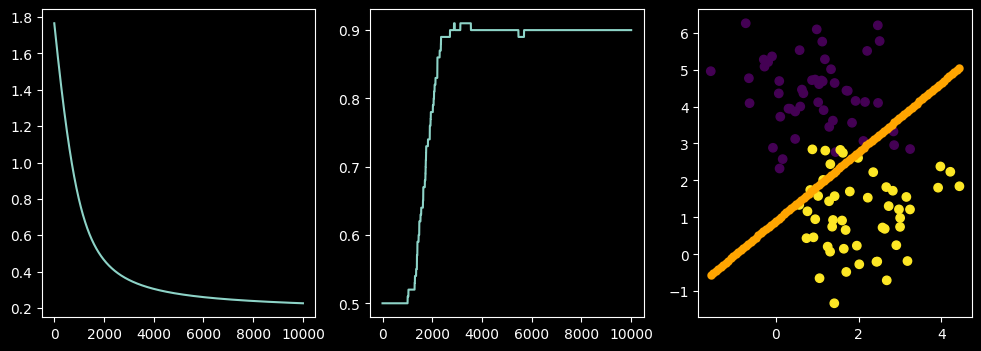

100%|██████████| 30000/30000 [00:07<00:00, 4030.12it/s]


0.53


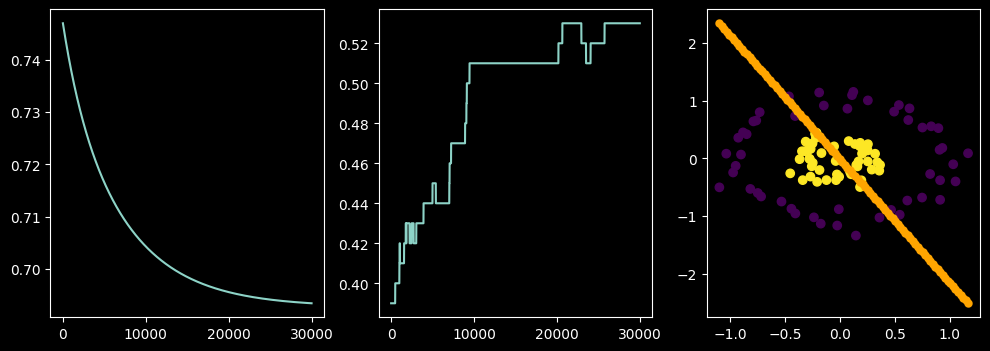

In [ ]:
W_li,b_li = neurone(X_li,y_li,learning_rate=0.001,n_inter=10000)
W_nl,b_nl = neurone(X_nl,y_nl,learning_rate=0.001,n_inter=30000)

# definition du reseaux de neurones a une couche 

In [ ]:
def initialisation(n0,n1,n2):
    w1 = random.rand(n1,n0)
    b1 = np.zeros((n1, 1))

    w2 = random.rand(n2,n1)
    b2 = np.zeros((n2, 1))
     
    parametres = {
        'w1' : w1,
        'b1' : b1,

        'w2' : w2,
        'b2' : b2

    }

    return parametres

In [ ]:
def sigmoid(z):
    return np.where(
        z >= 0,
        1 / (1 + np.exp(-z)),        
        np.exp(z) / (1 + np.exp(z))  
    )


In [ ]:
def forward_propagation(X,parametres):

    w1 = parametres['w1']
    b1 = parametres['b1']

    w2 = parametres['w2']
    b2 = parametres['b2']

    z1 = w1.dot(X)+b1
    a1 = sigmoid(z1)

    z2 = w2.dot(a1)+b2
    a2 = sigmoid(z2)

    activations = {
        'a1' : a1,

        'a2' :a2
    }

    return activations

In [ ]:
def back_propagation(X,y,parametres,activations):

    a1 = activations['a1']
    w2 = parametres['w2']

    a2 = activations['a2']

    m = len(y)

    dz2 = a2 - y
    dw2 = (1/m)*dz2.dot(a1.T)
    db2 = (1/m)*np.sum(dz2,axis = 1, keepdims=True)

    dz1 = np.dot(w2.T, dz2) * a1 * (1 - a1)
    dw1 = (1/m)*dz1.dot(X.T)
    db1 = (1/m)*np.sum(dz1,axis= 1, keepdims=True)

    gradients={
        'dw1' : dw1,
        'db1' : db1,
        
        'dw2' : dw2,
        'db2' : db2
    }

    return gradients



In [ ]:
def update(parametres,gradients,learning_rate):

    w1 = parametres['w1']
    b1 = parametres['b1']

    w2 = parametres['w2']
    b2 = parametres['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']

    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1

    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2

    parametres={
        'w1':w1,
        'b1':b1,
        'w2':w2,
        'b2':b2
    }
    return parametres


In [ ]:
def predict(X,parametres):
    activations = forward_propagation(X,parametres)
    a2 = activations['a2']
    return a2 >= 0.5

In [ ]:
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
def neural_network(X,y,n1,learning_rate=0.1,n_iter=1000):
    X = X.T
    y = y.reshape((1, y.shape[0]))
    n0  = X.shape[0]
    n2 = y.shape[0]

    parametres = initialisation(n0,n1,n2)
    loss = []
    acc = []
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X,parametres)
        a2 = activations['a2']
        if i %10 == 0:
            loss.append(log_loss(y.flatten(), a2.flatten()))
            y_pred = predict(X, parametres)
            acc.append(accuracy_score(y.flatten(), y_pred.flatten()))

        gradients = back_propagation(X,y,parametres,activations)
        parametres = update(parametres,gradients,learning_rate)
            
    y_pred = predict()
    print(accuracy_score(y.ravel(),y_pred.ravel()))
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.plot(loss,label='train loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(acc,label="accuracy")
    plt.legend()
    plt.show()
    return (parametres)

In [ ]:
parametres_li = neural_network(X_li,y_li,n1=32,learning_rate=0.001,n_iter=10000)
parametres_nl = neural_network(X_nl,y_nl,n1=32,learning_rate=0.001,n_iter=10000)

NameError: name 'neural_network' is not defined

In [ ]:
print(y_nl.shape)
y_nl = y_nl.flatten()
print(y_nl.shape)

(100, 1)
(100,)
